In [ ]:
'''
TASK 7: Get Basic Sales Summary from a Tiny SQLite Database using Python

Objective: Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and
display it using basic print statements and a simple bar chart
'''

In [47]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Create a new database & connect to SQLite database (will create if doesn't exist)

In [48]:
conn = sqlite3.connect('sales_data.db')       # Connect to database
cursor = conn.cursor()                        # Create a cursor to run SQL

In [ ]:
# Step 2: Create sales table (if it doesn't exist)

In [49]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product_name TEXT,
        quantity_sold INTEGER,
        price_per_unit REAL
    )
''')

In [ ]:
# Step 3: Insert sample sales data

In [50]:
sample_data = [
    ('Apple', 10, 1.2),
    ('Banana', 15, 0.5),
    ('Orange', 8, 0.8),
    ('Grapes', 12, 1.0),
    ('Mango', 5, 1.5)
]

cursor.executemany('INSERT INTO sales (product_name, quantity_sold, price_per_unit) VALUES (?, ?, ?)', sample_data)
conn.commit()


In [ ]:
# Step 4: Run SQL query

In [51]:
query = '''
SELECT 
    product_name,
    SUM(quantity_sold) AS total_quantity,
    SUM(quantity_sold * price_per_unit) AS total_revenue
FROM sales
GROUP BY product_name
'''

In [ ]:
# Step 5: Load into pandas DataFrame

In [52]:
df = pd.read_sql_query(query, conn)

In [ ]:
# Step 6: Print results

In [53]:
print("Sales Summary:")
print(df)

Sales Summary:
  product_name  total_quantity  total_revenue
0        Apple              40           48.0
1       Banana              60           30.0
2       Grapes             128          144.0
3        Mango              20           30.0
4       Orange              32           25.6


In [ ]:
# Delete rows based on a condition

In [54]:
cursor.execute('''
    DELETE FROM sales
    WHERE product_name = 'Banana'
''')

In [ ]:
# Commit changes

In [55]:
conn.commit()

In [56]:
print(df)

  product_name  total_quantity  total_revenue
0        Apple              40           48.0
1       Banana              60           30.0
2       Grapes             128          144.0
3        Mango              20           30.0
4       Orange              32           25.6


In [ ]:
# Delete multiple products at once

In [59]:
cursor.execute('''
    DELETE FROM sales
    WHERE product_name IN ('Mangoes', 'Oranges', 'Apples')
''')

conn.commit()

In [60]:
print(df)

  product_name  total_quantity  total_revenue
0        Apple              40           48.0
1       Banana              60           30.0
2       Grapes             128          144.0
3        Mango              20           30.0
4       Orange              32           25.6


In [ ]:
# Step 7 : Visualizations

In [ ]:
# Plot bar chart for Total Quantity Sold

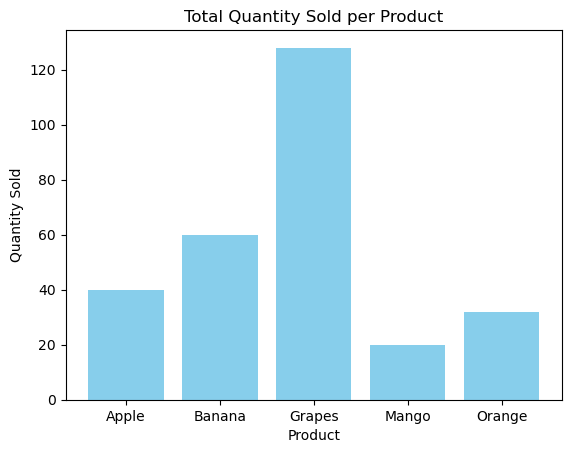

In [95]:
plt.bar(df['product_name'], df['total_quantity'], color='skyblue')
plt.title('Total Quantity Sold per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
# Bar chart for Total Revenue

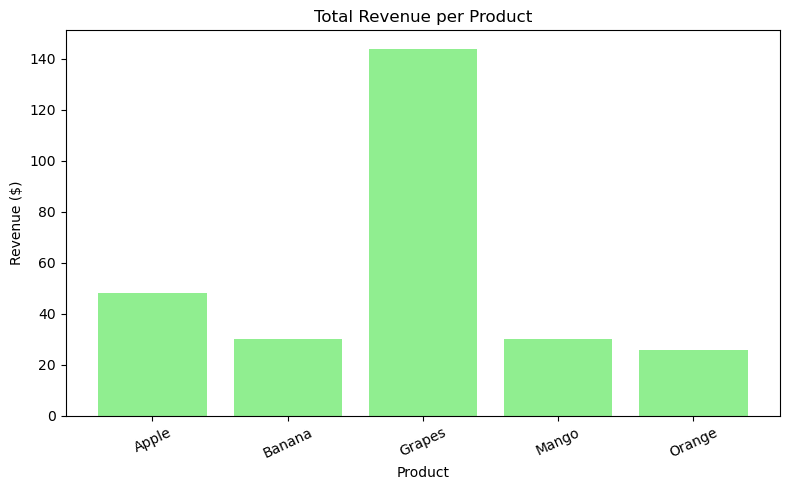

In [98]:
plt.figure(figsize=(8, 5))
plt.bar(df['product_name'], df['total_revenue'], color='lightgreen')
plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

In [78]:
# Plot using Seaborn

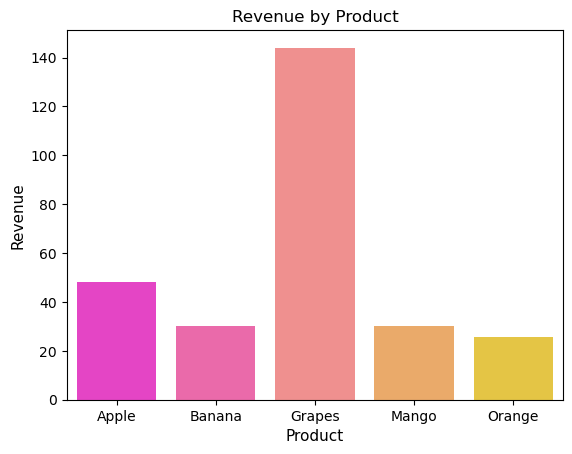

In [102]:
sns.barplot(x='product_name', y='total_revenue', data=df, palette='spring')

plt.title('Revenue by Product', fontsize=12)
plt.xlabel('Product', fontsize=11)
plt.ylabel('Revenue', fontsize=11)
plt.show()

In [ ]:
# Save the chart (optional)

In [103]:
plt.savefig('sales_chart_seaborn.png')

<Figure size 640x480 with 0 Axes>

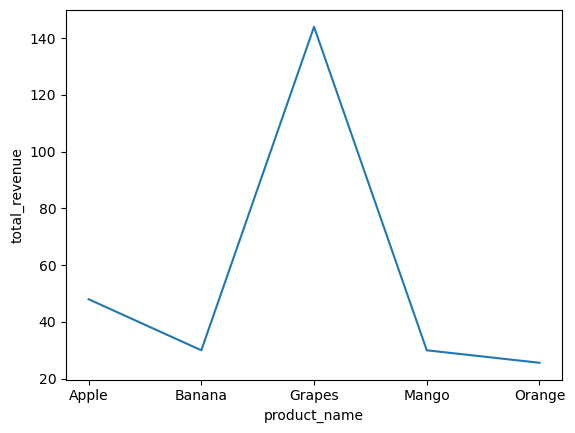

In [109]:
sns.lineplot(data = df, x = "product_name", y = "total_revenue")
plt.show()

In [ ]:
# Pie chart of revenue share

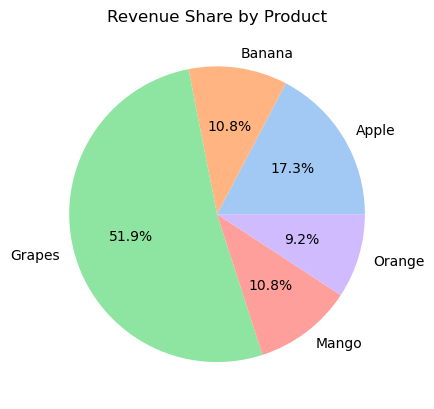

In [116]:
plt.pie(df['total_revenue'], labels=df['product_name'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Product')
plt.show()

In [ ]:
# Horizontal Bar Chart — Total Quantity Sold

Text(0, 0.5, 'Product')

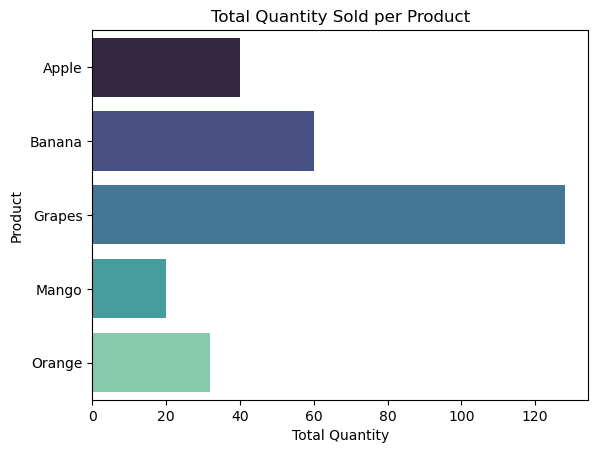

In [118]:
sns.barplot(x='total_quantity', y='product_name', data=df, palette='mako')
plt.title('Total Quantity Sold per Product')
plt.xlabel('Total Quantity')
plt.ylabel('Product')

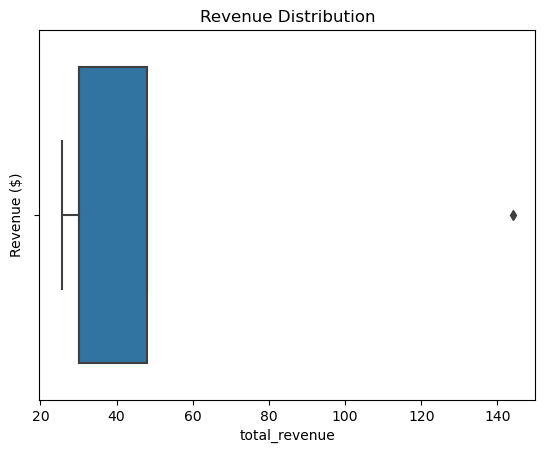

In [125]:
sns.boxplot(data = df, x = "total_revenue")
plt.title('Revenue Distribution')
plt.ylabel('Revenue ($)')
plt.show()

In [135]:
# Step 8: Close the connection
conn.close()